# Get Data Files from Kaggle

---



To use Kaggle datasets in Google colab we need to grab a token from kaggle.
That’s going to download a file called kaggle.json.

In [0]:
#!rm -dr ~/.kaggle
!pip install -U -q kaggle

!mkdir -p ~/.kaggle
from google.colab import files


In [3]:
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oussamatn","key":"6a2e8a66785e7c90254580b027a26da8"}'}

In [4]:
#Set up the Kaggle directory and moving the datasets from kaggle to Google Colab. 
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c ashrae-energy-prediction



  0% 0.00/2.53M [00:00<?, ?B/s]
100% 2.53M/2.53M [00:00<00:00, 84.8MB/s]
 83% 73.0M/88.4M [00:00<00:00, 79.9MB/s]
100% 88.4M/88.4M [00:00<00:00, 121MB/s] 
 88% 147M/167M [00:01<00:00, 68.7MB/s]
100% 167M/167M [00:01<00:00, 111MB/s] 
  0% 0.00/44.5k [00:00<?, ?B/s]
100% 44.5k/44.5k [00:00<00:00, 41.4MB/s]
  0% 0.00/1.27M [00:00<?, ?B/s]
100% 1.27M/1.27M [00:00<00:00, 86.8MB/s]
 99% 119M/120M [00:01<00:00, 105MB/s]  
100% 120M/120M [00:01<00:00, 108MB/s]


In [5]:
#Files are in compressed format. We need to unzip them.
!unzip weather_train.csv.zip
!unzip weather_test.csv.zip
!unzip test.csv.zip
!unzip train.csv.zip
!unzip sample_submission.csv.zip


Archive:  weather_train.csv.zip
  inflating: weather_train.csv       
Archive:  weather_test.csv.zip
  inflating: weather_test.csv        
Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               
Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   


# Imports 

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# matplotlib and seaborn for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Read a comma-separated values (csv) file into DataFrame.
#Pandas DataFrames make manipulating the data easy, from selecting or replacing columns and indices to reshaping the data.
BuildM_DF=pd.read_csv("building_metadata.csv")
Weather_train_DF = pd.read_csv("weather_train.csv")
Weather_Test_DF = pd.read_csv("weather_test.csv")
Train_DF = pd.read_csv("train.csv")

 # Visualization

## Visualize the training DataFrame

In [8]:
#Display the size of this data frame using the `shape`
Train_DF.shape

(20216100, 4)

In [9]:
#Display the first 10 rows of this data frame by calling the `head`
Train_DF.head(10)

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0
5,5,0,2016-01-01 00:00:00,0.0
6,6,0,2016-01-01 00:00:00,0.0
7,7,0,2016-01-01 00:00:00,0.0
8,8,0,2016-01-01 00:00:00,0.0
9,9,0,2016-01-01 00:00:00,0.0


In [10]:
#Display the data types of the data frame columns using the `dtypes`
Train_DF.dtypes

building_id        int64
meter              int64
timestamp         object
meter_reading    float64
dtype: object

In [11]:
#missing values in all columns
Train_DF.isnull().sum()

building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

In [12]:
Train_DF.describe()

,building_id,meter,meter_reading
count,2.021610e+07,2.021610e+07,2.021610e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03
std,4.269133e+02,9.309921e-01,1.532356e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01
50%,8.950000e+02,0.000000e+00,7.877500e+01
75%,1.179000e+03,1.000000e+00,2.679840e+02
max,1.448000e+03,3.000000e+00,2.190470e+07


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72ca2f7cc0>,
      dtype=object)

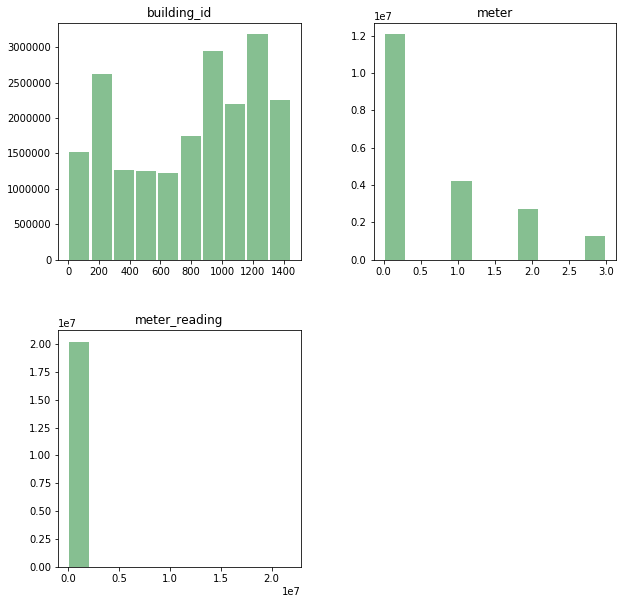

In [13]:
# Make a histogram of the DataFrame’s.
Train_DF.hist(bins=10, grid=False, figsize=(10,10), color='#86bf91', zorder=1, rwidth=0.9)

## Visualize the Building DataFrame

In [14]:
BuildM_DF.shape


(1449, 6)

In [16]:
# display the rate of missing values.
(BuildM_DF.isnull().sum()/ BuildM_DF.shape[0])*100
# Year_built and floor_count columns should be dropped as they are missing more than 50% of values 

site_id         0.000000
building_id     0.000000
primary_use     0.000000
square_feet     0.000000
year_built     53.416149
floor_count    75.500345
dtype: float64

In [17]:
# 'primary_use' is categorical variable.
BuildM_DF.primary_use.value_counts()
#we should keep categories with value_count less than 100 in another new category

Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                             25
Healthcare                        23
Parking                           22
Warehouse/storage                 13
Manufacturing/industrial          12
Retail                            11
Services                          10
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

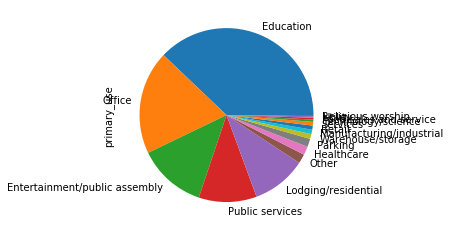

In [18]:
BuildM_DF.primary_use.value_counts().plot.pie()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72c775aa90>,
      dtype=object)

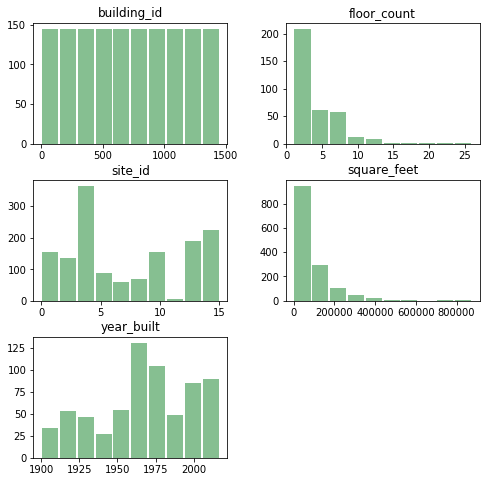

In [19]:
# Make a histogram of the DataFrame’s.
BuildM_DF.hist(bins=10, grid=False, figsize=(8,8), color='#86bf91', zorder=1, rwidth=0.9)

## Visualize Weather DataFrame


In [20]:
Weather_train_DF.shape

(139773, 9)

In [21]:
Weather_train_DF.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [23]:
(Weather_train_DF.isnull().sum()/Weather_train_DF.shape[0]) *100
# We should replace Nan values with the the median.

site_id                0.000000
timestamp              0.000000
air_temperature        0.039350
cloud_coverage        49.489529
dew_temperature        0.080845
precip_depth_1_hr     35.979052
sea_level_pressure     7.596603
wind_direction         4.484414
wind_speed             0.217496
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72c75b2128>,
      dtype=object)

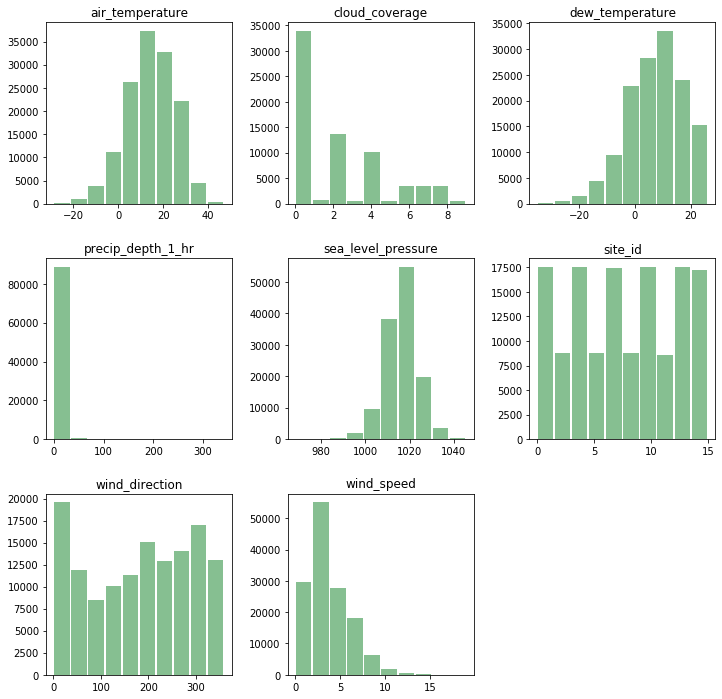

In [24]:
Weather_train_DF.hist(bins=10, grid=False, figsize=(12,12), color='#86bf91', zorder=1, rwidth=0.9)

## Visualize the difference between train and test weather data

In [0]:
#  plot dist curves for train and test weather data for the given column name

def plot_dist_col(column):
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.distplot(Weather_train_DF[column].dropna(), color='green', ax=ax).set_title(column, fontsize=16)
    sns.distplot(Weather_Test_DF[column].dropna(), color='purple', ax=ax).set_title(column, fontsize=16)
    plt.xlabel(column, fontsize=15)
    plt.legend(['train', 'test'])
    plt.show()


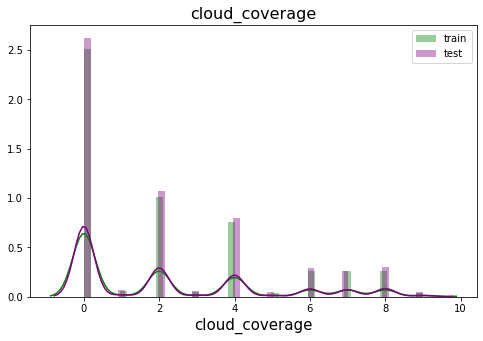

In [36]:
plot_dist_col('cloud_coverage')

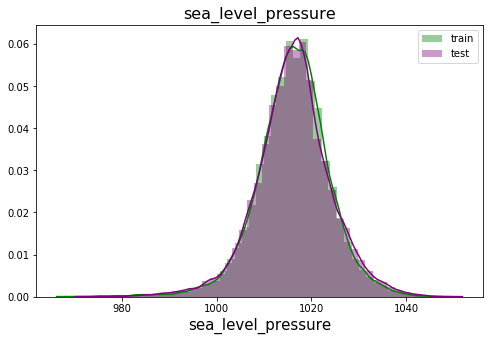

In [37]:
plot_dist_col('sea_level_pressure')

# Clean the Data and merge it

In [0]:
# gathering low frequency categories  another new category
categories=["Religious worship","Utility","Food sales and service","Technology/science","Services","Retail","Manufacturing/industrial","Warehouse/storage","Parking","Healthcare","Other"]
BuildM_DF.loc[BuildM_DF.primary_use.isin(categories),'primary_use'] = 'others'
BuildM_DF["primary_use"] = BuildM_DF["primary_use"].astype('category')
BuildM_DF["primary_use"] = BuildM_DF["primary_use"].cat.codes
BuildM_DF['primary_use'] = BuildM_DF.primary_use.astype("int64")

In [0]:
#drop Year_built and floor_count columns.
BuildM_DF = BuildM_DF.drop(columns=['year_built','floor_count'], axis=1)

In [0]:
# Replace missing values in the Weather Dataframe with the mean.
Weather_train_DF['air_temperature'].fillna(Weather_train_DF['air_temperature'].mean(), inplace=True)
Weather_train_DF['dew_temperature'].fillna(Weather_train_DF['dew_temperature'].mean(), inplace=True)
Weather_train_DF['wind_speed'].fillna(Weather_train_DF['wind_speed'].mean(), inplace=True)
Weather_train_DF['precip_depth_1_hr'].fillna(Weather_train_DF['precip_depth_1_hr'].mean(), inplace=True)
Weather_train_DF['cloud_coverage'].fillna(Weather_train_DF['cloud_coverage'].mean(), inplace=True)
Weather_train_DF['wind_direction'].fillna(Weather_train_DF['wind_direction'].mean(), inplace=True)
Weather_train_DF['sea_level_pressure'].fillna(Weather_train_DF['sea_level_pressure'].mean(), inplace=True)

In [6]:
Weather_train_DF.isnull().sum()


site_id               0
timestamp             0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

In [0]:
# merge Train_DF , BuildM_DF and Weather_train_DF into one DataFrame.
Train_DF = Train_DF.merge(BuildM_DF, on='building_id', how='left')
Train_DF = Train_DF.merge(Weather_train_DF, on=['site_id', 'timestamp'], how='left')

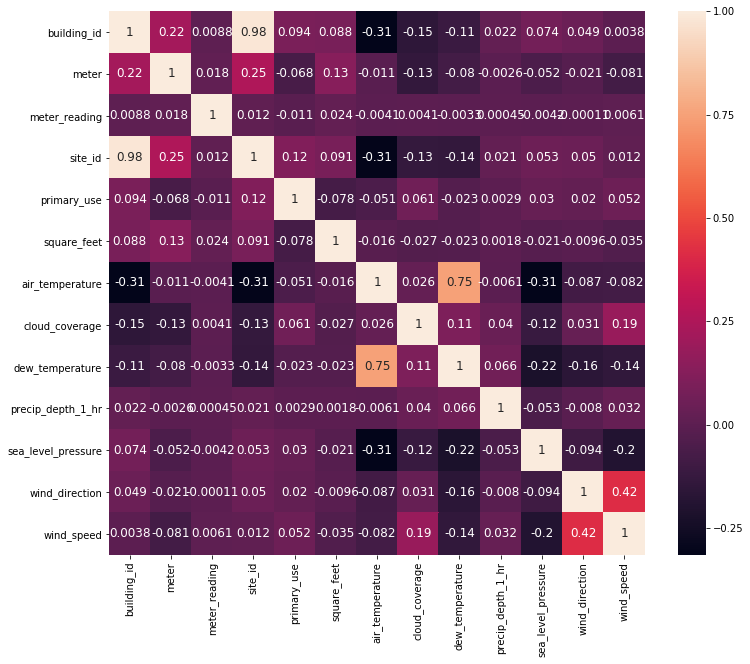

In [9]:
#Display the correlation matrix
corrmat=Train_DF.corr()
fig,ax=plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,annot=True,annot_kws={'size': 12})

# Correlation matrix shows that air temperature is highly correlated with dew temperature, and wind direction is correlated with wind speed, thus, the feature dimension is reduced by dropping dew temperature and wind direction. 


In [0]:
Train_DF = Train_DF.drop(columns=['dew_temperature','wind_direction'])

In [0]:
# The timestamp field of hourly measurements across 2016 is decomposed into “month”, “week”, “day” fields.

Train_DF["datetime"] = pd.to_datetime(Train_DF["timestamp"])
Train_DF["day"] = Train_DF["datetime"].dt.day
Train_DF["week"] = Train_DF["datetime"].dt.week
Train_DF["month"] = Train_DF["datetime"].dt.month
    

In [0]:
Train_DF = Train_DF.drop(columns=[ 'timestamp','datetime'], axis=1)


In [11]:
Train_DF.isnull().sum()
# After the merge, some Nan values appears.

building_id               0
meter                     0
meter_reading             0
site_id                   0
primary_use               0
square_feet               0
air_temperature       90495
cloud_coverage        90495
precip_depth_1_hr     90495
sea_level_pressure    90495
wind_speed            90495
day                       0
week                      0
month                     0
dtype: int64

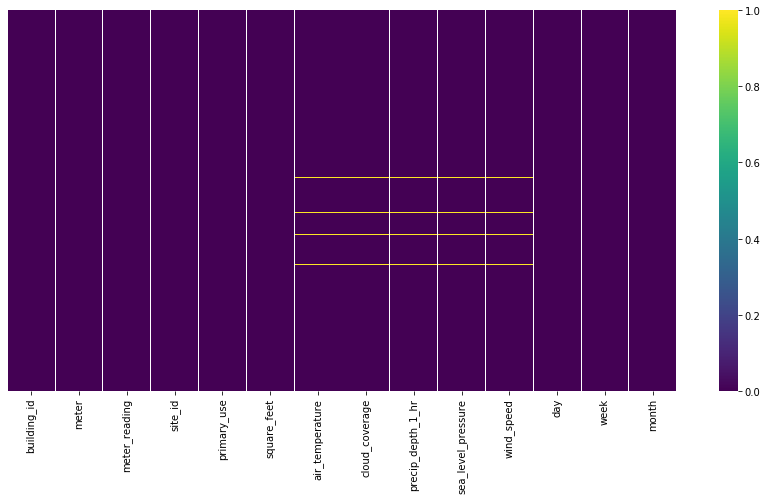

In [12]:
#Identify the distribution of missing values
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(Train_DF.isnull(), yticklabels=False, cmap='viridis')

In [0]:
#Droping samples containing Nan values doesn"t affect the shape of the DataFrame.
Train_DF= Train_DF.dropna()

In [0]:
## Function to reduce the DF size
def reduce_memory_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [12]:
reduce_memory_usage(Train_DF)

Mem. usage decreased to 652.57 Mb (71.7% reduction)


,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,precip_depth_1_hr,sea_level_pressure,wind_speed,day,week,month
0,0,0,0.000000,0,0,7432,25.000000,6.000000,0.98291,1019.5,0.000000,1,53,1
1,1,0,0.000000,0,0,2720,25.000000,6.000000,0.98291,1019.5,0.000000,1,53,1
2,2,0,0.000000,0,0,5376,25.000000,6.000000,0.98291,1019.5,0.000000,1,53,1
3,3,0,0.000000,0,0,23685,25.000000,6.000000,0.98291,1019.5,0.000000,1,53,1
4,4,0,0.000000,0,0,116607,25.000000,6.000000,0.98291,1019.5,0.000000,1,53,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,0,8.750000,15,1,19619,1.700195,2.148438,-1.00000,1008.5,8.796875,31,52,12
20216096,1445,0,4.825000,15,0,4298,1.700195,2.148438,-1.00000,1008.5,8.796875,31,52,12
20216097,1446,0,0.000000,15,1,11265,1.700195,2.148438,-1.00000,1008.5,8.796875,31,52,12
20216098,1447,0,159.574997,15,2,29775,1.700195,2.148438,-1.00000,1008.5,8.796875,31,52,12


# Split Train_Test

In [16]:
#We Split the training dataset into two sets : train_df and test_df.
# train_df is used to train the model
# test_df is used to test it. 
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(Train_DF, test_size=0.2, random_state=45)
train_df.head()

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,precip_depth_1_hr,sea_level_pressure,wind_speed,day,week,month
9659130,179,1,222.757004,2,5,24867,35.593750,6.000000,0.0,1010.5,4.101562,26,25,6
194120,890,0,436.000000,9,0,202937,3.300781,0.000000,0.0,1027.0,2.599609,4,1,1
10908162,1311,0,48.945801,14,2,66794,26.703125,0.000000,0.0,1015.5,3.099609,18,29,7
15059245,1119,2,0.000000,13,3,119509,18.296875,2.148438,0.0,1023.0,4.601562,1,39,10
1097070,224,0,544.150024,2,0,272278,20.000000,2.000000,0.0,1018.0,1.500000,20,3,1


In [0]:
# x_train is the input of the model. It contains the features samples. y_train is the target variable 'meter_reading'
y_train = train_df['meter_reading']
x_train = train_df.drop(columns=['meter_reading'])
y_test = test_df['meter_reading']
x_test = test_df.drop(columns=['meter_reading'])

In [18]:
x_train

,building_id,meter,site_id,primary_use,square_feet,air_temperature,cloud_coverage,precip_depth_1_hr,sea_level_pressure,wind_speed,day,week,month
9659130,179,1,2,5,24867,35.593750,6.000000,0.0,1010.5,4.101562,26,25,6
194120,890,0,9,0,202937,3.300781,0.000000,0.0,1027.0,2.599609,4,1,1
10908162,1311,0,14,2,66794,26.703125,0.000000,0.0,1015.5,3.099609,18,29,7
15059245,1119,2,13,3,119509,18.296875,2.148438,0.0,1023.0,4.601562,1,39,10
1097070,224,0,2,0,272278,20.000000,2.000000,0.0,1018.0,1.500000,20,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508447,1185,1,13,3,129532,-0.600098,8.000000,0.0,1006.5,4.101562,16,7,2
17812702,1249,0,14,3,159384,11.703125,0.000000,0.0,1017.0,1.500000,19,46,11
867999,750,0,6,0,35990,12.796875,2.148438,0.0,1003.0,4.101562,16,2,1
11528968,549,0,3,4,12754,28.906250,2.000000,0.0,1012.5,3.099609,30,30,7


# Run and evaluate Model

In [58]:
from sklearn import preprocessing
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from keras.models import Sequential
from keras.optimizers import RMSprop,Adam
from keras import regularizers


Using TensorFlow backend.


In [0]:
#Early stopping is basically stopping the training once your loss starts to increase
es = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5, verbose=True, mode='auto')

In [0]:
def root_mean_squared_error(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true)))
  
metrics=root_mean_squared_error


In [0]:
def make_model(input_dim=9,metrics=root_mean_squared_error,loss='mse', optimizer="rmsprop",drop_rate=0.2):

  model = Sequential()
  model.add(LSTM(128,return_sequences=True, input_shape=(None,input_dim)))
  model.add(Dropout(drop_rate))
  model.add(BatchNormalization())

  model.add(LSTM(128,return_sequences=False))
  model.add(BatchNormalization())
  model.add(Dropout(drop_rate))

  model.add(Dense(1))
  model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])
  
  return model

In [0]:
def run_model(model,x_train,y_train,epochs=50,batch_size=500,verbose=1,validation_data=(x_test,y_test),callbacks =None):
  x_train = x_train.values[:]
  x_train= x_train.reshape((x_train.shape[0],1,x_train.shape[-1]))
  y_train = np.log1p(y_train)
  if validation_data != None:
    x_test = validation_data[0].values[:]
    x_test = x_test.reshape((x_test.shape[0],1,x_test.shape[-1]))
    y_test = np.log1p(validation_data[-1])
      
  return model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,verbose=verbose,validation_data=(x_test,y_test),callbacks=callbacks)

In [0]:
model3 = make_model(input_dim=13,drop_rate=0.2)

In [69]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, None, 128)         72704     
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, None, 128)         512       
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [0]:
history2 = run_model(model3,x_train,y_train,epochs=5,batch_size=500,verbose=1,validation_data=(x_test,y_test), callbacks =[es]) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 16100484 samples, validate on 4025121 samples
Epoch 1/5





16100484/16100484 [==============================] - 748s 46us/step - loss: 4.6163 - root_mean_squared_error: 2.1452 - val_loss: 4.5666 - val_root_mean_squared_error: 2.1359
Epoch 2/5
16100484/16100484 [==============================] - 743s 46us/step - loss: 4.5717 - root_mean_squared_error: 2.1371 - val_loss: 4.5674 - val_root_mean_squared_error: 2.1361
Epoch 3/5
16100484/16100484 [==============================] - 718s 45us/step - loss: 4.5674 - root_mean_squared_error: 2.1361 - val_loss: 4.5749 - val_root_mean_squared_error: 2.1378
Epoch 4/5
16100484/16100484 [==============================] - 747s 46us/step - loss: 4.5656 - root_mean_squared_error: 2.1357 - val_loss: 4.5686 - val_root_mean_squared_error: 2.1364
Epoch 5/5
16100484/16100484 [==============================] - 731s 45us/step - loss: 4.5650 - root_mean_sq

In [0]:
loss = history2.history
loss.keys()

dict_keys(['val_loss', 'val_root_mean_squared_error', 'loss', 'root_mean_squared_error'])

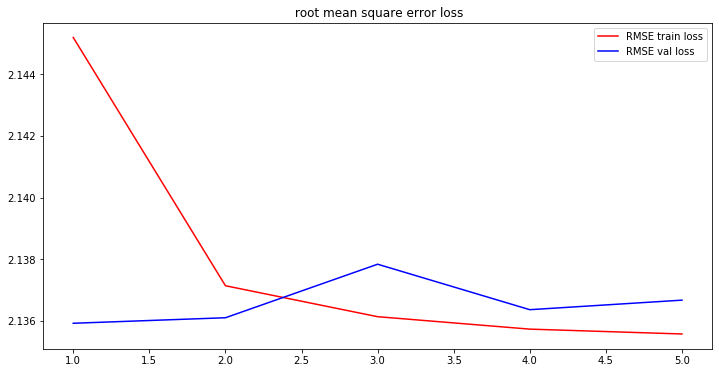

In [0]:
#rmse loss
rmse_loss_train = loss['root_mean_squared_error']
rmse_loss_val = loss['val_root_mean_squared_error']
epochs_stops = es.stopped_epoch +1 # epochs number from early stopping
epochs = range(1,6)  #len(loss_train)
plt.figure(figsize=(12,6))
plt.plot(epochs,rmse_loss_train,'r', label='RMSE train loss')
plt.plot(epochs,rmse_loss_val,'b',label='RMSE val loss')
plt.title(' root mean square error loss')
plt.legend()
plt.show()

# Data Test Cleaning

In [0]:
#The same as the data train cleaning
Test_DF_T = pd.read_csv("test.csv")

In [0]:
Test_DF_T = Test_DF_T.merge(BuildM_DF, on='building_id', how='left')
Test_DF_T = Test_DF_T.merge(Weather_Test_DF,left_on=['site_id','timestamp'],right_on=['site_id','timestamp'],how='left')

In [0]:
Test_DF_T["datetime"] = pd.to_datetime(Test_DF_T["timestamp"])
Test_DF_T["day"] = Test_DF_T["datetime"].dt.day
Test_DF_T["week"] = Test_DF_T["datetime"].dt.week
Test_DF_T["month"] = Test_DF_T["datetime"].dt.month
    

In [0]:
Test_DF_T = Test_DF_T.drop(columns=['datetime','timestamp'])

In [0]:
Test_DF_T = Test_DF_T.drop(columns=['dew_temperature','wind_direction','row_id'])

In [0]:
Test_DF_T['air_temperature'].fillna(Test_DF_T['air_temperature'].mean(), inplace=True)
Test_DF_T['cloud_coverage'].fillna(Test_DF_T['cloud_coverage'].mean(), inplace=True)
Test_DF_T['wind_speed'].fillna(Test_DF_T['wind_speed'].mean(), inplace=True)
Test_DF_T['precip_depth_1_hr'].fillna(Test_DF_T['precip_depth_1_hr'].mean(), inplace=True)
Test_DF_T['sea_level_pressure'].fillna(Test_DF_T['sea_level_pressure'].mean(), inplace=True)

In [19]:
Test_DF_T.shape

(41697600, 13)

In [20]:
reduce_memory_usage(Test_DF_T)

Mem. usage decreased to 1192.98 Mb (73.2% reduction)


,building_id,meter,site_id,primary_use,square_feet,air_temperature,cloud_coverage,precip_depth_1_hr,sea_level_pressure,wind_speed,day,week,month
0,0,0,0,0,7432,17.796875,4.000000,0.918457,1021.5,3.599609,1,52,1
1,1,0,0,0,2720,17.796875,4.000000,0.918457,1021.5,3.599609,1,52,1
2,2,0,0,0,5376,17.796875,4.000000,0.918457,1021.5,3.599609,1,52,1
3,3,0,0,0,23685,17.796875,4.000000,0.918457,1021.5,3.599609,1,52,1
4,4,0,0,0,116607,17.796875,4.000000,0.918457,1021.5,3.599609,1,52,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41697595,1444,0,15,1,19619,15.507812,1.973633,0.918457,1016.0,3.386719,9,19,5
41697596,1445,0,15,0,4298,15.507812,1.973633,0.918457,1016.0,3.386719,9,19,5
41697597,1446,0,15,1,11265,15.507812,1.973633,0.918457,1016.0,3.386719,9,19,5
41697598,1447,0,15,2,29775,15.507812,1.973633,0.918457,1016.0,3.386719,9,19,5


In [0]:
Test_DF_T = Test_DF_T.values[:]

In [22]:
Test_DF_T.shape

(41697600, 13)

In [0]:
Test_DF_T = Test_DF_T.reshape((Test_DF_T.shape[0],1,Test_DF_T.shape[-1]))

# Submit

In [0]:
predicted =model3.predict(Test_DF_T, batch_size=1024, verbose=1)


41697600/41697600 [==============================] - 402s 10us/step


In [0]:
#predicted = np.expm1(predicted)


In [0]:
#len(predicted)

41697600

In [0]:
#submit = pd.read_csv('sample_submission.csv')

In [0]:
#submit['meter_reading'] = predicted


In [0]:
#submit.to_csv('submission.csv', index=False,float_format='%.4f')

In [0]:
#submit.head()


,row_id,meter_reading
0,0,59.484806
1,1,59.484806
2,2,59.484806
3,3,59.484806
4,4,59.484806


In [0]:
#!kaggle competitions submit ashrae-energy-prediction -f submission.csv -m 'Final submission'


100% 665M/665M [00:26<00:00, 26.4MB/s]
Successfully submitted to ASHRAE - Great Energy Predictor III